In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.special as sf
from scipy.optimize import curve_fit

# Problem 1

In [2]:
data = pd.read_csv('Downloads/Zee_Run2011A.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 22 columns):
Run             18885 non-null int64
Event           18885 non-null int64
pt1             18885 non-null float64
eta1            18885 non-null float64
phi1            18885 non-null float64
Q1              18885 non-null int64
type1           18885 non-null object
sigmaEtaEta1    18885 non-null float64
HoverE1         18885 non-null float64
isoTrack1       18885 non-null float64
isoEcal1        18885 non-null float64
isoHcal1        18885 non-null float64
pt2             18885 non-null float64
eta2            18885 non-null float64
phi2            18885 non-null float64
Q2              18885 non-null int64
type2           18885 non-null object
sigmaEtaEta2    18885 non-null float64
HoverE2         18885 non-null float64
isoTrack2       18885 non-null float64
isoEcal2        18885 non-null float64
isoHcal2        18885 non-null float64
dtypes: float64(16), int64(4), object(2)
me

# Problem 2

In [3]:
import math
a = np.cosh(0)
miv_e = (  2*data.pt1*data.pt2*( np.cosh(data.eta1-data.eta2)- np.cos(data.phi1- data.phi2))  )**0.5
data['Miv_e'] = miv_e
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 23 columns):
Run             18885 non-null int64
Event           18885 non-null int64
pt1             18885 non-null float64
eta1            18885 non-null float64
phi1            18885 non-null float64
Q1              18885 non-null int64
type1           18885 non-null object
sigmaEtaEta1    18885 non-null float64
HoverE1         18885 non-null float64
isoTrack1       18885 non-null float64
isoEcal1        18885 non-null float64
isoHcal1        18885 non-null float64
pt2             18885 non-null float64
eta2            18885 non-null float64
phi2            18885 non-null float64
Q2              18885 non-null int64
type2           18885 non-null object
sigmaEtaEta2    18885 non-null float64
HoverE2         18885 non-null float64
isoTrack2       18885 non-null float64
isoEcal2        18885 non-null float64
isoHcal2        18885 non-null float64
Miv_e           18885 non-null float64
dtyp

Text(0, 0.5, 'bins/ instances')

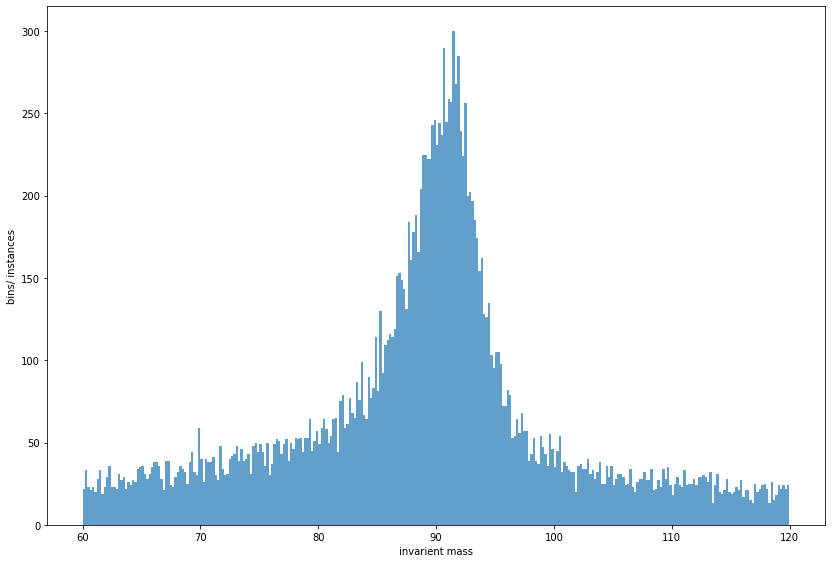

In [4]:
fig = plt.figure()
#plt.title('invarient mass of electron')
axes = fig.add_axes([0.2,0.2,1.8,1.8])
axes.hist(miv_e,bins=300,alpha = 0.7);
plt.xlabel("invarient mass")
plt.ylabel("bins/ instances")

# Problem 3

In [5]:
M = data.Miv_e
def breit(E, gamma, M, a, b, A):
    little_gamma = np.sqrt(M**2*(M**2 + gamma**2))
    k = 2*np.sqrt(2)*M*gamma*little_gamma/(np.pi*np.sqrt(M**2 + little_gamma))
    return a*E + b + A*(k/((E**2 - M**2)**2 + M**2 * gamma**2))
# curve = a * E + b + c*breit

low = 60
high = 120
bins = 250

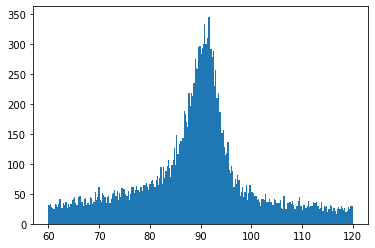

In [6]:
fig = plt.figure()
histogram_elec = plt.hist(miv_e, bins=bins, range=(low,high))

it is saying the best electron invarient mass is  90.75175173030519 GeV
 a z boson would be 91 GeV, this means our data is close


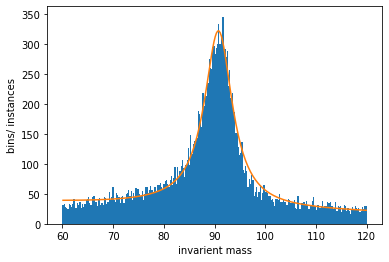

In [7]:
bbins = histogram_elec[0]
mass = 0.5*( histogram_elec[1][0:-1] + histogram_elec[1][1:] )

initials = [2.0,92,-5, 250, 11000]
best_elec, R_elec = curve_fit(breit, mass, bbins, p0=initials)
   
histogram_elec = plt.hist(miv_e, bins=bins, range=(low,high))
plt.plot(mass, breit(mass, *best_elec))

histogram_elec
plt.xlabel("invarient mass")
plt.ylabel("bins/ instances")

print("it is saying the best electron invarient mass is ",best_elec[1], "GeV")
print(" a z boson would be 91 GeV, this means our data is close")

In [8]:
n = 10000 #steps taken
miv = data.Miv_e

"""
for i in range (n):
    test =[np.random.normal(initials[-1][0],0.5),np.random.normal(initials[-1][1],0.5)]
    RR_test = get_chi_squared(Particles, )
    t = (np.random.random() <= (Relectron[-1])/Relectron_test )

    if t.any():
        initaials.append(test)
        Relectron.append(Relectron_test)
    else:
        initials.append(params[-1])
        Relectron.append(Relectron[-1])
"""
Relectron = breit(miv, *best_elec) # this is wrong, should probably be higher to get a reduced near 1
chisq= np.amin(Relectron)
dof = bins - len(initials) -1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
reduced= chisq/dof
print(chisq, "is chisq")
print(dof, "is degree of freedom")
print(reduced,'is reduced chisq') #way to low

22.51581618251372 is chisq
244 is degree of freedom
0.09227793517423656 is reduced chisq


# Problem 4

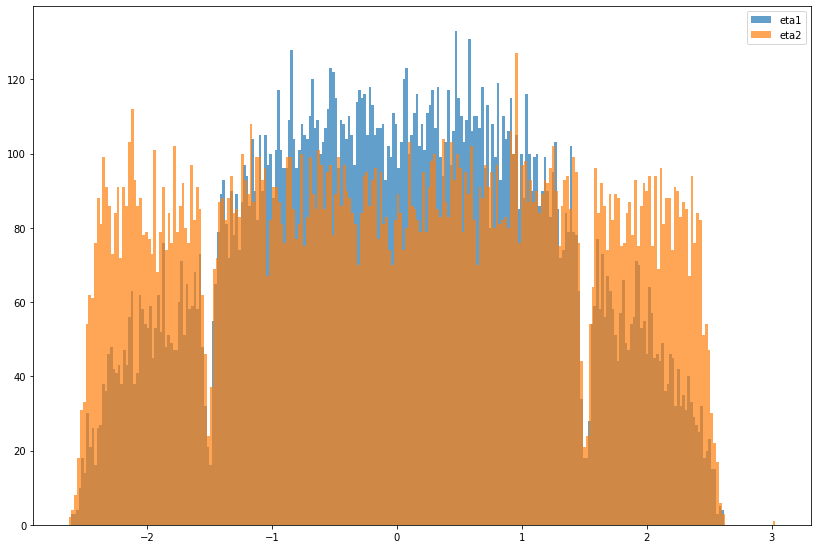

In [9]:
eta1 = data.eta1
eta2 = data.eta2
fig = plt.figure()
#plt.title('invarient mass of electron')
axes = fig.add_axes([0.2,0.2,1.8,1.8])
axes.hist(eta1,bins=250,alpha = 0.7, label = 'eta1')
axes.hist(eta2,bins=250,alpha = 0.7, label = 'eta2')
plt.legend();

# Problem 5

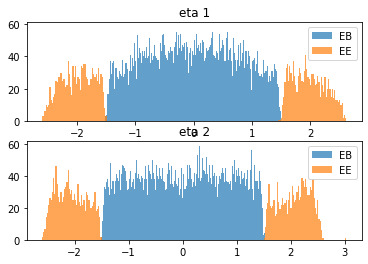

In [10]:
barrel = data[(data.type1 == 'EB') & (data.type2 == 'EB')];
endcap = data[(data.type1 == 'EE') & (data.type2 == 'EE')];

plt.subplot(211)

plt.hist(barrel['eta1'], bins = 250, alpha = 0.7, label = 'EB');
plt.hist(endcap['eta1'], bins = 250, alpha = 0.7, label = 'EE');
plt.title("eta 1")
plt.legend()
print()

plt.subplot(212)
plt.hist(barrel['eta2'], bins = 250, alpha = 0.7, label = 'EB');
plt.hist(endcap['eta2'], bins = 250, alpha = 0.7, label = 'EE');
plt.title("eta 2")
plt.legend()

In [11]:
print("eta2 looks more shifted toward lower,negaive values when compareted to eta1")
print("however our assumption that detector changes eta does not make sense, because both have the same shape and format")
print("eta goes from -2.5 to 2.5 degree roughly, which is the angle with respect to beam axis foward/ backwards ")

eta2 looks more shifted toward lower,negaive values when compareted to eta1
however our assumption that detector changes eta does not make sense, because both have the same shape and format
eta goes from -2.5 to 2.5 degree roughly, which is the angle with respect to beam axis foward/ backwards 


# Problem 6

the barrel gives higher invarient mass


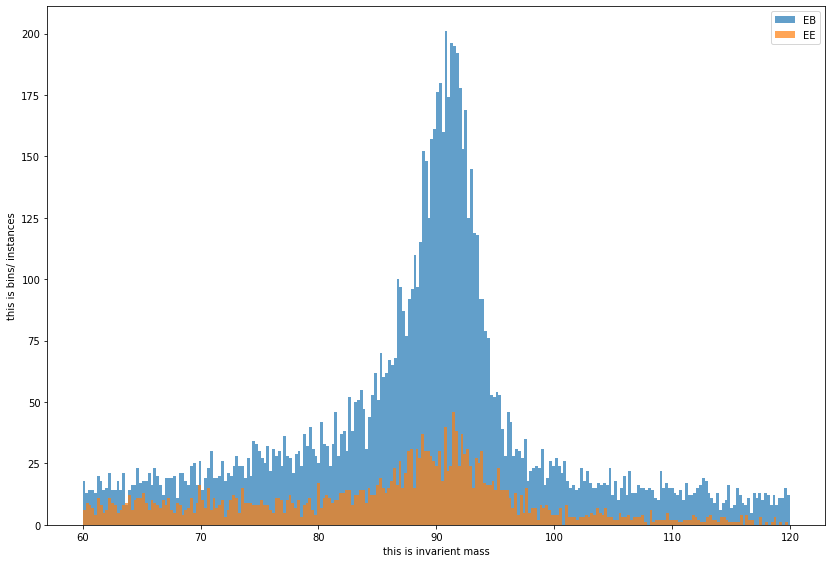

In [12]:
fig = plt.figure()
#plt.title('invarient mass of electron')
axes = fig.add_axes([0.2,0.2,1.8,1.8])
axes.hist(barrel.Miv_e,bins=250,alpha = 0.7, label = 'EB')
axes.hist(endcap.Miv_e,bins=250,alpha = 0.7, label = 'EE')
plt.legend();
plt.xlabel("this is invarient mass")
plt.ylabel("this is bins/ instances")
print("the barrel gives higher invarient mass")

In [13]:

b = barrel.Miv_e.std()
e = endcap.Miv_e.std()
print(b, "GeV for the barrel EB")
print(e, "GeV for the endcap EE")
print("the barrel has a smaller standard deviation and thus better resolution")
print("the histogram confirms this as the EB seems be more closed in on 91 GeV, while the EE is spreadout")

11.489115344078318 GeV for the barrel EB
12.229202324653295 GeV for the endcap EE
the barrel has a smaller standard deviation and thus better resolution
the histogram confirms this as the EB seems be more closed in on 91 GeV, while the EE is spreadout


# Problem 7

In [14]:
data.drop(data.columns.difference(['pt1','eta1','phi1','pt2','eta2','phi2','Miv_e']), 1, inplace=True)
data

,pt1,eta1,phi1,pt2,eta2,phi2,Miv_e
0,37.5667,2.289180,2.052600,45.4315,1.470640,-1.163050,89.589562
1,36.2901,-0.837253,-1.585920,60.5754,-0.489570,1.049600,92.252290
2,25.9705,-0.697420,1.635990,45.2954,-2.040090,3.118750,67.859158
3,41.0075,1.461920,-0.532464,45.9013,1.156060,2.478580,87.604923
4,39.8985,-0.592666,-2.394720,34.8931,-2.244440,0.610610,101.426755
...,...,...,...,...,...,...,...
18880,67.9728,0.591181,2.824340,32.7795,0.566588,0.203395,91.232354
18881,42.8005,-2.291330,0.779165,49.8503,-1.640510,-2.741140,95.750631
18882,25.4359,0.137592,2.641270,50.9959,1.518880,-0.962316,88.378684
18883,51.1762,0.778649,2.683120,30.0143,-0.386661,-0.451479,92.069605


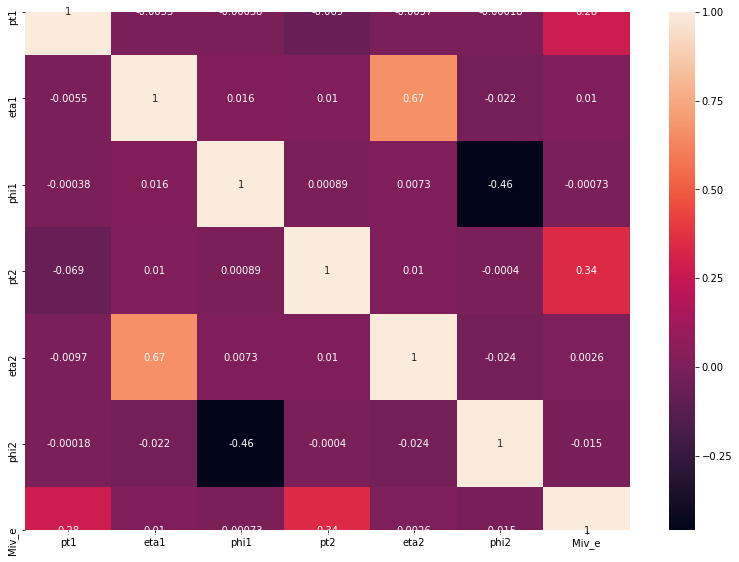

In [15]:
import seaborn as sns
corr = data.corr()
fig = plt.figure()
axes = fig.add_axes([0.2,0.2,1.8,1.8])
plt.imshow(corr)
sns.heatmap(data.corr(), annot= True)

In [16]:
print("eta1 and eta2 have strongest correlation")

eta1 and eta2 have strongest correlation
